In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

import re

In [9]:
df_b_5x = pd.read_csv('plot_data/Brain5xFAD_OzON_Results_04Jan2024.csv')
df_b_wt = pd.read_csv('plot_data/BrainWT_OzON_Results_04Jan2024.csv')
df_liver = pd.read_csv('plot_data/LiverOzON_04Jan2024.csv')
df = pd.concat([df_b_wt, df_b_5x, df_liver])
#print len sum of all dataframes
print(len(df_b_wt) + len(df_b_5x) + len(df_liver))
# #drop Cluster_Label and Group columns
df = df.drop(['Area', 'Group','Cluster_Ground_Truth_Dif'], axis=1)
# #drop unnamed columns
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

553


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Biology,Genotype,FAC,TG,Max_Intensity,Cluster_RT,Area_DDT,Area_DDT_Ratio,Mouse,SLBG_group
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,cereb,WT,FA16:1,TG(52:5),673.0,12.015200,36.0,0.00,DOD94_F3,14
1,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,cereb,WT,FA16:1,TG(52:5),26428.0,12.015183,2903.0,0.09,FAD185_M4,19
2,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,cereb,WT,FA16:1,TG(52:5),2939.0,12.067500,249.0,0.09,FAD185_M4,19
3,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,6437.0,cereb,WT,FA16:1,TG(52:5),6437.0,12.015233,616.0,0.12,FAD189_M3,23
4,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,1045.0,cereb,WT,FA16:1,TG(52:5),1045.0,12.067533,74.0,0.12,FAD189_M3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,liver,5xFAD,FA18:1,"TG(58:5), TG(59:12)",642.0,16.041500,68.0,NaN,FAD173_M1,106
193,"[TG(59:13),TG(58:6)]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,489.0,liver,5xFAD,FA18:1,"TG(58:6), TG(59:13)",489.0,15.509183,51.0,NaN,DOD73_M2,107
194,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,1293.0,liver,5xFAD,FA18:1,"TG(58:6), TG(59:13)",1293.0,15.509183,144.0,NaN,FAD131_M1,108
195,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.55,1197.0,liver,5xFAD,FA18:1,"TG(58:6), TG(59:13)",1197.0,15.553600,151.0,NaN,FAD131_M2,109


Add Liver Brain label

In [6]:

# # Define function to extract biology term
# def extract_biology(sample_id):
#     for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
#         if term in sample_id.lower():
#             return term
#     return None

# # Apply function to create new column
# df['Biology'] = df['Sample_ID'].apply(extract_biology)
# df['Genotype'] = df['Sample_ID'].apply(lambda x: '5xFAD' if 'WT' not in x else 'WT')

# # df.to_csv('df_for_gpt.csv')

# # Extracting the mouse name from the 'Sample_ID' column
# df['Mouse'] = df['Sample_ID'].apply(lambda x: '_'.join(x.split('_')[1:3]))
# df

In [61]:
df['SLBG_group'] = df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
df['Lipid_Biology_group'] = df.groupby(['Lipid', 'Biology']).ngroup()
# # Filter for 'liver' in Biology
# liver_df = df[df['Biology'] == 'liver']
# # Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
# brain_df = pd.concat([
#     df[df['Biology'] == 'cortex'],
#     df[df['Biology'] == 'cereb'],
#     df[df['Biology'] == 'hippo'],
#     df[df['Biology'] == 'dienc']
# ])
# brain_df

# # Group by Lipid and db_pos
# liver_df['SLBG_group'] = liver_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# brain_df['SLBG_group'] = brain_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()



# # Assuming df is your DataFrame

# # Step 1: Extract the last part of the Lipid name
# df['FAC'] = df['Lipid'].str.extract(r'(FA\d+:\d+)$')

# Step 2: Sort the DataFrame
# We'll sort by the new 'Lipid_End' column, and then by the original 'Lipid' column to maintain order within each group
df = df.sort_values(by=['FAC', 'Lipid'], ascending=[True, True])

# If you specifically want 'FA16:1' to appear before 'FA18:1'
# You might need a custom sorting function or a categorical type for the 'FAC' column
df['FAC'] = pd.Categorical(df['FAC'], categories=['FA16:1', 'FA18:1'], ordered=True)
df = df.sort_values(by=['FAC', 'Lipid'])


df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Biology,Genotype,FAC,TG,Max_Intensity,Cluster_RT,Area_DDT,Area_DDT_Ratio,Mouse,SLBG_group,Lipid_Biology_group
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,cereb,WT,FA16:1,TG(52:5),673.0,12.015200,36.0,0.00,DOD94_F3,38,5
1,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,cereb,WT,FA16:1,TG(52:5),26428.0,12.015183,2903.0,0.09,FAD185_M4,43,5
2,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,cereb,WT,FA16:1,TG(52:5),2939.0,12.067500,249.0,0.09,FAD185_M4,43,5
3,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,6437.0,cereb,WT,FA16:1,TG(52:5),6437.0,12.015233,616.0,0.12,FAD189_M3,47,5
4,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,1045.0,cereb,WT,FA16:1,TG(52:5),1045.0,12.067533,74.0,0.12,FAD189_M3,47,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,liver,5xFAD,FA18:1,"TG(58:5), TG(59:12)",642.0,16.041500,68.0,NaN,FAD173_M1,387,66
193,"[TG(59:13),TG(58:6)]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,489.0,liver,5xFAD,FA18:1,"TG(58:6), TG(59:13)",489.0,15.509183,51.0,NaN,DOD73_M2,388,67
194,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,1293.0,liver,5xFAD,FA18:1,"TG(58:6), TG(59:13)",1293.0,15.509183,144.0,NaN,FAD131_M1,389,67
195,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.55,1197.0,liver,5xFAD,FA18:1,"TG(58:6), TG(59:13)",1197.0,15.553600,151.0,NaN,FAD131_M2,390,67


copy df to df2 to do db calcuations

In [62]:
# Copying df2 to create df3
df2 = df.copy()
import pandas as pd

# Assuming df is your DataFrame
# Replace df with your actual DataFrame variable name if it's different

# Group by 'SLBG_group' and sum the 'OzESI_Intensity' for each group
# Assign the summed intensity back to each row in the original DataFrame
df2['total_area'] = df2.groupby('SLBG_group')['Area_DDT'].transform('sum')



df2

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Biology,Genotype,FAC,TG,Max_Intensity,Cluster_RT,Area_DDT,Area_DDT_Ratio,Mouse,SLBG_group,Lipid_Biology_group,total_area
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,cereb,WT,FA16:1,TG(52:5),673.0,12.015200,36.0,0.00,DOD94_F3,38,5,36.0
1,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,cereb,WT,FA16:1,TG(52:5),26428.0,12.015183,2903.0,0.09,FAD185_M4,43,5,3152.0
2,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,cereb,WT,FA16:1,TG(52:5),2939.0,12.067500,249.0,0.09,FAD185_M4,43,5,3152.0
3,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,6437.0,cereb,WT,FA16:1,TG(52:5),6437.0,12.015233,616.0,0.12,FAD189_M3,47,5,690.0
4,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,1045.0,cereb,WT,FA16:1,TG(52:5),1045.0,12.067533,74.0,0.12,FAD189_M3,47,5,690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,liver,5xFAD,FA18:1,"TG(58:5), TG(59:12)",642.0,16.041500,68.0,NaN,FAD173_M1,387,66,68.0
193,"[TG(59:13),TG(58:6)]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,489.0,liver,5xFAD,FA18:1,"TG(58:6), TG(59:13)",489.0,15.509183,51.0,NaN,DOD73_M2,388,67,51.0
194,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,1293.0,liver,5xFAD,FA18:1,"TG(58:6), TG(59:13)",1293.0,15.509183,144.0,NaN,FAD131_M1,389,67,144.0
195,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.55,1197.0,liver,5xFAD,FA18:1,"TG(58:6), TG(59:13)",1197.0,15.553600,151.0,NaN,FAD131_M2,390,67,151.0


In [50]:
# import pandas as pd

# # Assuming df2 is your DataFrame
# # Replace df2 with your actual DataFrame variable name if it's different

# # Function to calculate n-9% for each row
# def calculate_n9_percent(row):
#     if row['db_pos'] == 'n-9':
#         return (row['OzESI_Intensity'] / row['total_intensity']) * 100
#     else:
#         return 0  # Return 0 for rows where db_pos is not 'n-9'

# # Apply the function to each row
# df2['n-9%'] = df2.apply(calculate_n9_percent, axis=1)

# # Rename df2 to df3 as per your requirement
# df3 = df2.copy()
# # df3.to_excel('df3.xlsx')
# df3

In [64]:
# Creating a new dataframe df3 from df_liver2
df3 = df2.copy()
# Function to calculate n-9% for each row
def calculate_n9_percent(row):
    if row['db'] == 'n-9' and row['total_area'] != 0:
        return (row['Area_DDT'] / row['total_area']) * 100
    else:
        return 0  # Return 0 for rows where db is not 'n-9' or total_area is zero

# Apply the function to each row
df3['n-9%'] = df3.apply(calculate_n9_percent, axis=1)



# # Function to determine the value for the FAC column
# def determine_fac(lipid):
#     if 'FA18:1' in lipid:
#         return 'FA18:1'
#     elif 'FA16:1' in lipid:
#         return 'FA16:1'
#     else:
#         return None  # or some other default value

# # Apply the function to the Lipid column to create the FAC column
# df3['FAC'] = df3['Lipid'].apply(determine_fac)

# import pandas as pd
# import re

# # Function to extract TG values
# def extract_tg(lipid):
#     # Regular expression pattern to match TG(##:#) or similar patterns
#     pattern = r'TG\(\d+:\d+\)'
#     matches = re.findall(pattern, lipid)
#     return ', '.join(matches) if matches else None

# # Apply the function to the Lipid column to create the TG column
# df3['TG'] = df3['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
df3['TG'] = df3['TG'].apply(sort_tg_values)
df3 = df3.sort_values(by=['FAC', 'TG'])


# Function to remove TG(##:0) patterns from the Lipid string
def remove_tg_zero(lipid):
    # Pattern to match TG(##:0)
    pattern = r'TG\(\d+:0\)'
    # Remove TG(##:0) patterns
    new_lipid = re.sub(pattern, '', lipid)
    # Remove any extra commas and spaces left after removal
    new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
    return new_lipid

# Apply the function to the Lipid column
df3['Lipid'] = df3['Lipid'].apply(remove_tg_zero)

# Continue with the rest of your code for sorting
# ... [rest of your code] ...

# Displaying df_l


# Displaying df3 with the new relative intensity columns
df3

# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df3[(df3['Lipid'].str.contains('TG\(56:7\)')) ]

filtered_rows

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Biology,Genotype,FAC,TG,Max_Intensity,Cluster_RT,Area_DDT,Area_DDT_Ratio,Mouse,SLBG_group,Lipid_Biology_group,total_area,n-9%
21,"[TG(56:7),]_FA16:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,840.8,651.6,13.02,836.0,liver,5xFAD,FA16:1,TG(56:7),836.0,13.022967,141.0,0.00,DOD73_M2,305,44,141.0,0.000000
22,"[TG(56:7),]_FA16:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,840.8,651.6,13.07,1236.0,liver,5xFAD,FA16:1,TG(56:7),1236.0,13.067400,230.0,0.34,FAD131_M1,306,44,309.0,0.000000
23,"[TG(56:7),]_FA16:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,812.8,651.6,13.03,808.0,liver,5xFAD,FA16:1,TG(56:7),808.0,13.029450,79.0,0.34,FAD131_M1,306,44,309.0,25.566343
24,"[TG(56:7),]_FA16:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-7,840.8,651.6,13.07,1568.0,liver,5xFAD,FA16:1,TG(56:7),1568.0,13.067683,245.0,0.41,FAD131_M2,307,44,345.0,0.000000
25,"[TG(56:7),]_FA16:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,812.8,651.6,13.12,1275.0,liver,5xFAD,FA16:1,TG(56:7),1275.0,13.118283,100.0,0.41,FAD131_M2,307,44,345.0,28.985507
26,"[TG(56:7),]_FA16:1",12012023_FAD131_M4_5xFAD_liver_O3on_01,n-7,840.8,651.6,13.07,484.0,liver,5xFAD,FA16:1,TG(56:7),577.0,12.978583,64.0,0.00,FAD131_M4,308,44,64.0,0.000000
27,"[TG(56:7),]_FA16:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-7,840.8,651.6,12.98,1008.0,liver,5xFAD,FA16:1,TG(56:7),1008.0,12.978617,131.0,0.36,FAD173_M1,309,44,178.0,0.000000
28,"[TG(56:7),]_FA16:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,812.8,651.6,13.16,274.0,liver,5xFAD,FA16:1,TG(56:7),689.0,12.985067,47.0,0.36,FAD173_M1,309,44,178.0,26.404494
167,"[TG(56:7),]_FA18:1",11282023_FAD184_F3_WT_cereb_O3on_01,n-9,812.8,623.6,13.16,424.0,cereb,WT,FA18:1,TG(56:7),424.0,13.162683,39.0,NaN,FAD184_F3,310,45,39.0,100.000000
168,"[TG(56:7),]_FA18:1",11282023_FAD184_F3_WT_cortex_O3on_01,n-7,840.8,623.6,13.11,437.0,cortex,WT,FA18:1,TG(56:7),437.0,13.112083,29.0,0.00,FAD184_F3,311,46,29.0,0.000000


In [65]:
# df4 = df3.copy()    
# #drop all db_pos != n-9
# df4 = df4[df4['db'] == 'n-9']
# df4
# # df4.to_excel('df4.xlsx')

In [77]:
import pandas as pd

# Assuming df3 is your DataFrame
# Create a copy of df3 to df_brain
df_brain = df3.copy()
df_brain = df_brain[df_brain['Biology'] != 'liver']

import pandas as pd

# Assuming df_brain is your existing DataFrame
# Let's say you know that for each combination of 'Lipid' and 'Genotype', you need 5 samples
# #################
# # Create a DataFrame with all possible combinations of 'Lipid' and 'Genotype'
# all_combinations = pd.MultiIndex.from_product([df_brain['Lipid'].unique(), df_brain['Genotype'].unique()], names=['Lipid', 'Genotype']).to_frame(index=False)

# # Add a column for 'n-9%' with zero values
# all_combinations['n-9%'] = 0

# # Concatenate this with the original DataFrame
# df_brain_with_zeros = pd.concat([df_brain, all_combinations]).reset_index(drop=True)

# ###including 0 values where lipid does not exist for a sample
# #############

# Now perform the grouping and aggregation
# grouped_brain = df_brain.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()

# The result will now include the zero values in the calculation


# Filter to get rows where db_pos is 'n-9' FILTERS FOR ONLY N-9 FOUND  ########################
n_9_df = df_brain[df_brain['db'] == 'n-9']

#### only from df values
# # Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_brain = n_9_df.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_brain.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_brain
df_brain = df_brain.merge(grouped_brain, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_brain['n-9_avg'] = df_brain['n-9_avg'].round(1)
df_brain['std_dev'] = df_brain['std_dev'].round(1)

# Display the last 50 rows of the DataFrame to verify the results
df_brain


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Biology,Genotype,FAC,...,Cluster_RT,Area_DDT,Area_DDT_Ratio,Mouse,SLBG_group,Lipid_Biology_group,total_area,n-9%,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,cereb,WT,FA16:1,...,12.015200,36.0,0.00,DOD94_F3,38,5,36.0,0.000000,10.0,2.3
1,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,cereb,WT,FA16:1,...,12.015183,2903.0,0.09,FAD185_M4,43,5,3152.0,0.000000,10.0,2.3
2,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,cereb,WT,FA16:1,...,12.067500,249.0,0.09,FAD185_M4,43,5,3152.0,7.899746,10.0,2.3
3,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,6437.0,cereb,WT,FA16:1,...,12.015233,616.0,0.12,FAD189_M3,47,5,690.0,0.000000,10.0,2.3
4,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,1045.0,cereb,WT,FA16:1,...,12.067533,74.0,0.12,FAD189_M3,47,5,690.0,10.724638,10.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,"[TG(57:11),TG(56:4)]_FA18:1",11292023_FAD189_M1_5xFAD_cortex_O3on_01,n-9,818.7,629.5,15.83,2394.0,cortex,5xFAD,FA18:1,...,15.825317,378.0,NaN,FAD189_M1,339,55,378.0,100.000000,100.0,0.0
352,"[TG(56:7),]_FA18:1",11282023_FAD184_F3_WT_cereb_O3on_01,n-9,812.8,623.6,13.16,424.0,cereb,WT,FA18:1,...,13.162683,39.0,NaN,FAD184_F3,310,45,39.0,100.000000,100.0,0.0
353,"[TG(56:7),]_FA18:1",11282023_FAD184_F3_WT_cortex_O3on_01,n-7,840.8,623.6,13.11,437.0,cortex,WT,FA18:1,...,13.112083,29.0,0.00,FAD184_F3,311,46,29.0,0.000000,100.0,0.0
354,"[TG(56:7),]_FA18:1",11282023_FAD189_M3_WT_dienc_O3on_01,n-9,812.8,623.6,13.16,657.0,dienc,WT,FA18:1,...,13.162683,38.0,NaN,FAD189_M3,312,47,38.0,100.000000,100.0,0.0


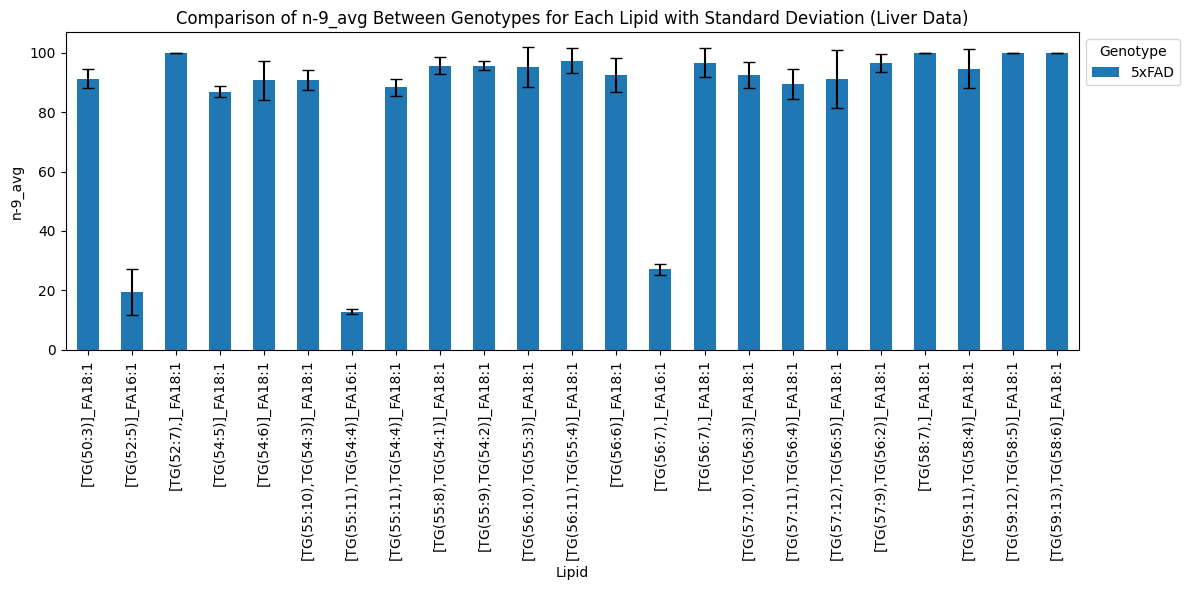

In [87]:
import pandas as pd

# Assuming df3 is your DataFrame
# Create a copy of df3 to df_liver
df_liver = df3.copy()
df_liver = df_liver[df_liver['Biology'] == 'liver']
df_liver
# # Filter to get rows where db_pos is 'n-9' FILTERS FOR ONLY N-9 FOUND  ###################
n_9_df = df_liver[df_liver['db'] == 'n-9']
# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df_liver[(df_liver['Lipid'].str.contains('TG\(58:5\)')) ]

filtered_rows
# ############
# # Create a DataFrame with all possible combinations of 'Lipid' and 'Genotype'
# all_combinations = pd.MultiIndex.from_product([df_liver['Lipid'].unique(), df_liver['Genotype'].unique()], names=['Lipid', 'Genotype']).to_frame(index=False)

# # Add a column for 'n-9%' with zero values
# all_combinations['n-9%'] = 0

# # Concatenate this with the original DataFrame
# df_liver_with_zeros = pd.concat([df_liver, all_combinations]).reset_index(drop=True)

# ###including 0 values where lipid does not exist for a sample
#################


# # Now perform the grouping and aggregation
grouped_liver = n_9_df.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()

grouped_liver.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_liver
df_liver = df_liver.merge(grouped_liver, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_liver['n-9_avg'] = df_liver['n-9_avg'].round(1)
df_liver['std_dev'] = df_liver['std_dev'].round(1)

# # Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
# filtered_rows = df_liver[(df_liver['Lipid'].str.contains('TG\(56:7\)')) ]

# filtered_rows

#print out n-9_avg and std_dev for each lipid
df_liver_drop = df_liver[['Lipid', 'Genotype','n-9_avg', 'std_dev']].drop_duplicates()

# Display the last 50 rows of the DataFrame to verify the results
df_liver

# Pivot the DataFrame to have Genotype as columns
pivot_df_liver = df_liver_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

pivot_df_liver


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_liver.plot(kind='bar', yerr=df_liver_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9_avg')
plt.title('Comparison of n-9_avg Between Genotypes for Each Lipid with Standard Deviation (Liver Data)')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
plt.show()





BRAIN 5xFAD vs WT

whole brain not working now?

In [88]:

# df_brain2 = df_brain.copy()
# df_brain_drop = df_brain2[['Lipid', 'Genotype','n-9_avg', 'std_dev']].drop_duplicates()


# # Pivot the DataFrame to have Genotype as columns
# pivot_df = df_brain_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')
# pivot_df
# def combined_sort_key(lipid):
#     # Check if lipid contains 'FA16:1'
#     fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

#     # Extract and sort TG values
#     tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
#     tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

#     # Combine the keys
#     return fa16_1_key + tg_list_sorted + lipid

# # Apply the combined sorting function to the Lipid index to create a sorting key
# pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)
# # Sort the DataFrame by the combined sorting key
# pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# # Drop the combined sorting key column
# pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)
# pivot_df
# # # Plotting
# # fig, ax = plt.subplots(figsize=(12, 6))
# # pivot_df.plot(kind='bar', yerr=pivot_df.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)
# # # Rotating x-axis labels and setting labels/title
# # plt.xlabel('Lipid')
# # plt.ylabel('n-9%')
# # plt.title('Whole Brain n-9% 5xFAD vs WT')
# # plt.xticks(rotation=90)  # Rotate x-axis labels
# # plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
# # plt.tight_layout()
# # # #save figure to Barplot_OzON/9% folder
# # # plt.savefig('Bar%/Max/WholeBrain_5xFADvsWT_9%.png', dpi=300)
# # plt.show()

whole brain fixed? double check

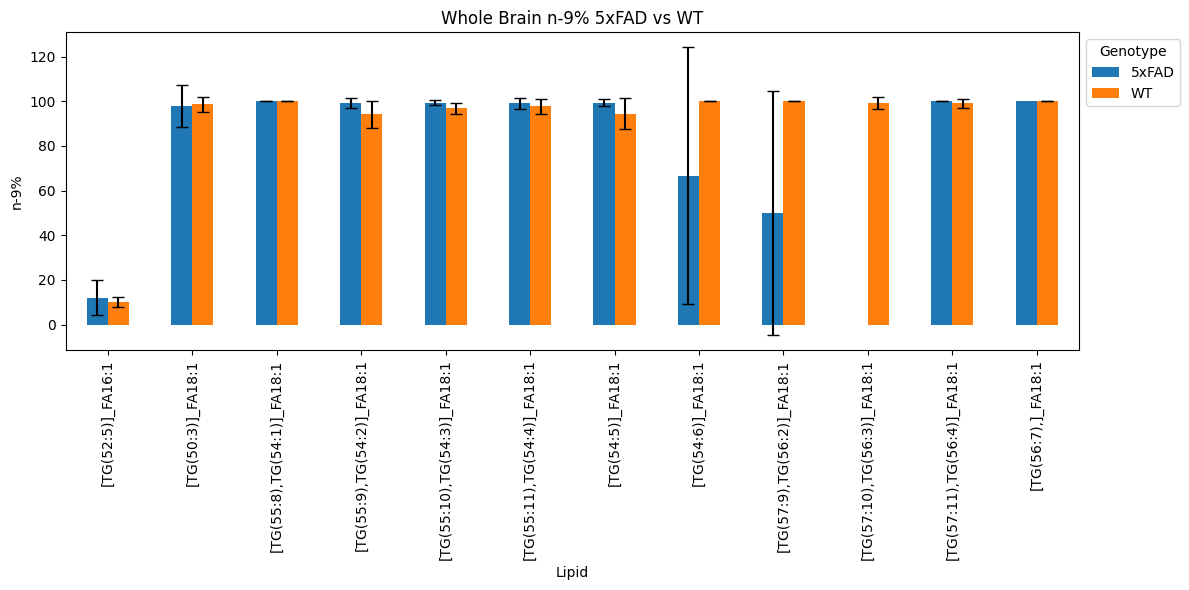

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,WT,10.0,2.3
16,[TG(52:5)]_FA16:1,5xFAD,12.0,7.9
35,[TG(50:3)]_FA18:1,WT,98.6,3.2
52,[TG(50:3)]_FA18:1,5xFAD,97.9,9.3
72,"[TG(55:8),TG(54:1)]_FA18:1",WT,100.0,0.0
82,"[TG(55:8),TG(54:1)]_FA18:1",5xFAD,100.0,0.0
86,"[TG(55:9),TG(54:2)]_FA18:1",WT,94.1,5.9
120,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,99.3,2.3
144,"[TG(55:10),TG(54:3)]_FA18:1",WT,96.8,2.6
179,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,99.4,1.2


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import re  # Make sure to import re for regular expression operations

# Assuming df_brain contains your whole brain data
df_brain2 = df_brain.copy()

# Filter and drop duplicates
df_brain_drop = df_brain2[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_brain = df_brain_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Define the combined sorting function
def combined_sort_key(lipid):
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
    return fa16_1_key + tg_list_sorted + lipid

# Apply the sorting function and sort the DataFrame
pivot_df_brain['Combined_Sort_Key'] = pivot_df_brain.index.to_series().apply(combined_sort_key)
pivot_df_brain.sort_values(by='Combined_Sort_Key', inplace=True)
pivot_df_brain.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_brain.plot(kind='bar', yerr=df_brain_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Setting labels and title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Whole Brain n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
#set x plot to 0
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# # # Save figure to folder
# plt.savefig('Bar%/Area/WholeBrain_5xFADvsWT_n-9%_Area.pdf', dpi=300)

plt.show()




df_brain_drop.to_csv('Bar%/std/WholeBrain_n9%_std.csv')
df_brain_drop.to_excel('Bar%/std/WholeBrain_n9%_std.xlsx')

df_brain_drop



each brain region 5xfad vs WT

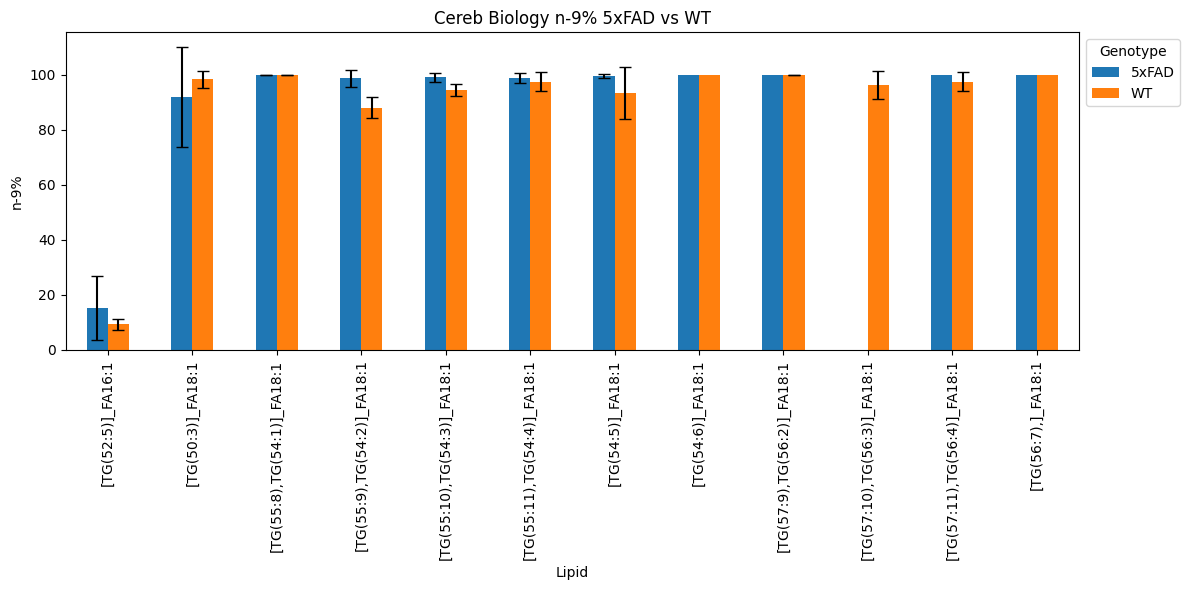

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,WT,9.3,2.0
2,[TG(52:5)]_FA16:1,5xFAD,15.2,11.8
4,[TG(50:3)]_FA18:1,WT,98.5,3.1
8,[TG(50:3)]_FA18:1,5xFAD,91.9,18.1
13,"[TG(55:8),TG(54:1)]_FA18:1",WT,100.0,0.0
16,"[TG(55:8),TG(54:1)]_FA18:1",5xFAD,100.0,0.0
18,"[TG(55:9),TG(54:2)]_FA18:1",WT,88.1,3.8
23,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,98.7,3.1
29,"[TG(55:10),TG(54:3)]_FA18:1",WT,94.4,2.2
34,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,99.1,1.6


In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_brain is your DataFrame from previous steps
df_cereb = df3.copy()
#filter out n-9% >0
df_cereb = df_cereb[df_cereb['n-9%'] > 0]

# Filter to include only rows where Biology is "cereb"
df_cereb = df_cereb[df_cereb['Biology'] == 'cereb']

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_cereb = df_cereb.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_cereb.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_cereb
df_cereb = df_cereb.merge(grouped_cereb, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_cereb['n-9_avg'] = df_cereb['n-9_avg'].round(1)
df_cereb['std_dev'] = df_cereb['std_dev'].round(1)
df_cereb



# Create a copy of df_cereb to df_cereb_drop
df_cereb_drop = df_cereb[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_cereb = df_cereb_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_cereb['Combined_Sort_Key'] = pivot_df_cereb.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_cereb = pivot_df_cereb.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_cereb.drop('Combined_Sort_Key', axis=1, inplace=True)
pivot_df_cereb
# # Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_cereb.plot(kind='bar', yerr=df_cereb_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)



# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Cereb Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
#save figure to Barplot_OzON/9% folder
plt.savefig('Bar%/Area/Cereb_5xFADvsWT_n-9%_Area.pdf', dpi=300)
plt.show()

df_cereb_drop.to_csv('Bar%/std/Cereb_n9%_std.csv')
df_cereb_drop.to_excel('Bar%/std/Cereb_n9%_std.xlsx')
df_cereb_drop


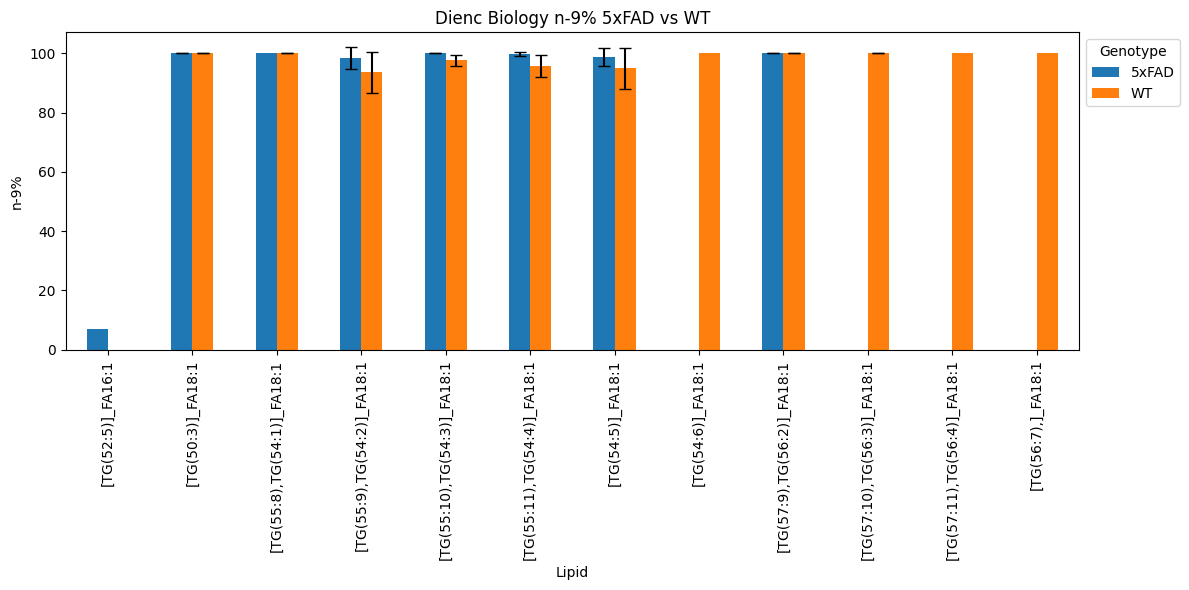

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,5xFAD,6.9,NaN
1,[TG(50:3)]_FA18:1,WT,100.0,0.0
6,[TG(50:3)]_FA18:1,5xFAD,100.0,0.0
12,"[TG(55:8),TG(54:1)]_FA18:1",WT,100.0,0.0
15,"[TG(55:8),TG(54:1)]_FA18:1",5xFAD,100.0,NaN
16,"[TG(55:9),TG(54:2)]_FA18:1",WT,93.6,6.9
21,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,98.4,3.6
26,"[TG(55:10),TG(54:3)]_FA18:1",WT,97.6,1.7
31,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,100.0,0.0
37,"[TG(55:11),TG(54:4)]_FA18:1",WT,95.7,3.6


In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
# Create a copy of df3 for the Dienc region
df_dienc = df3.copy()
df_dienc = df_dienc[(df_dienc['Biology'] == 'dienc') & (df_dienc['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_dienc = df_dienc.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_dienc.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_dienc
df_dienc = df_dienc.merge(grouped_dienc, on=['Lipid', 'Genotype'], how='left')
df_dienc['n-9_avg'] = df_dienc['n-9_avg'].round(1)
df_dienc['std_dev'] = df_dienc['std_dev'].round(1)

# Create a copy of df_dienc to df_dienc_drop
df_dienc_drop = df_dienc[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_dienc = df_dienc_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_dienc['Combined_Sort_Key'] = pivot_df_dienc.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_dienc = pivot_df_dienc.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_dienc.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting for Dienc
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_dienc.plot(kind='bar', yerr=df_dienc_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Dienc Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Bar%/Area/Dienc_5xFADvsWT_n-9%_Area.pdf', dpi=300)
plt.show()


df_dienc_drop.to_csv('Bar%/std/Dienc_n9%_std.csv')
df_dienc_drop.to_excel('Bar%/std/Dienc_n9%_std.xlsx')
df_dienc_drop

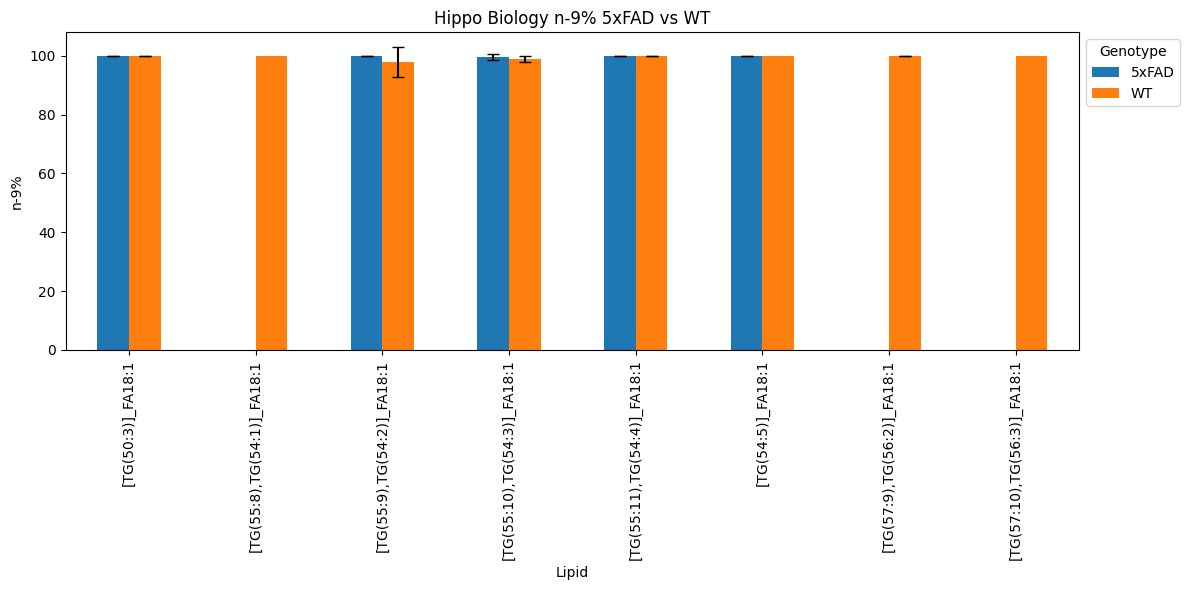

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(50:3)]_FA18:1,WT,100.0,0.0
2,[TG(50:3)]_FA18:1,5xFAD,100.0,0.0
6,"[TG(55:8),TG(54:1)]_FA18:1",WT,100.0,NaN
7,"[TG(55:9),TG(54:2)]_FA18:1",WT,97.8,5.0
12,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,100.0,0.0
17,"[TG(55:10),TG(54:3)]_FA18:1",WT,98.9,1.1
22,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,99.6,1.0
28,"[TG(55:11),TG(54:4)]_FA18:1",WT,100.0,0.0
33,"[TG(55:11),TG(54:4)]_FA18:1",5xFAD,100.0,0.0
38,[TG(54:5)]_FA18:1,WT,100.0,NaN


In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your original DataFrame
df_hippo = df3.copy()

# Filter to include only rows where Biology is "hippo" and n-9% values are greater than 0
df_hippo = df_hippo[(df_hippo['Biology'] == 'hippo') & (df_hippo['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and standard deviation of n-9%
grouped_hippo = df_hippo.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_hippo.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_hippo
df_hippo = df_hippo.merge(grouped_hippo, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_hippo['n-9_avg'] = df_hippo['n-9_avg'].round(1)
df_hippo['std_dev'] = df_hippo['std_dev'].round(1)

# Create a copy of df_hippo to df_hippo_drop
df_hippo_drop = df_hippo[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_hippo = df_hippo_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_hippo['Combined_Sort_Key'] = pivot_df_hippo.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_hippo = pivot_df_hippo.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_hippo.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_hippo.plot(kind='bar', yerr=df_hippo_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Hippo Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Bar%/Area/Hippo_5xFADvsWT_n-9%_Area.pdf', dpi=300)
plt.show()


df_hippo_drop.to_csv('Bar%/std/Hippo_n9%_std.csv')
df_hippo_drop.to_excel('Bar%/std/Hippo_n9%_std.xlsx')
df_hippo_drop

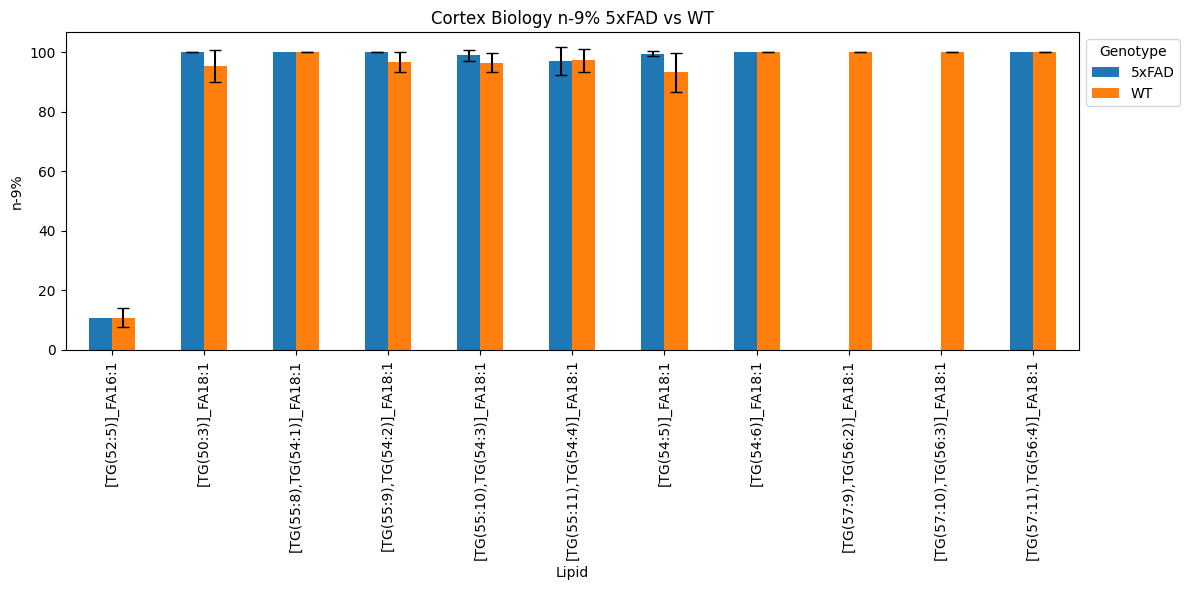

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,WT,10.8,3.1
2,[TG(52:5)]_FA16:1,5xFAD,10.8,NaN
3,[TG(50:3)]_FA18:1,WT,95.5,5.5
6,[TG(50:3)]_FA18:1,5xFAD,100.0,0.0
10,"[TG(55:8),TG(54:1)]_FA18:1",WT,100.0,0.0
13,"[TG(55:8),TG(54:1)]_FA18:1",5xFAD,100.0,NaN
14,"[TG(55:9),TG(54:2)]_FA18:1",WT,96.8,3.2
19,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,100.0,0.0
24,"[TG(55:10),TG(54:3)]_FA18:1",WT,96.6,3.2
29,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,99.0,1.8


In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your original DataFrame
df_cortex = df3.copy()

# Filter to include only rows where Biology is "cortex" and n-9% values are greater than 0
df_cortex = df_cortex[(df_cortex['Biology'] == 'cortex') & (df_cortex['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and standard deviation of n-9%
grouped_cortex = df_cortex.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_cortex.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_cortex
df_cortex = df_cortex.merge(grouped_cortex, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_cortex['n-9_avg'] = df_cortex['n-9_avg'].round(1)
df_cortex['std_dev'] = df_cortex['std_dev'].round(1)

# Create a copy of df_cortex to df_cortex_drop
df_cortex_drop = df_cortex[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_cortex = df_cortex_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')


def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_cortex['Combined_Sort_Key'] = pivot_df_cortex.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_cortex = pivot_df_cortex.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_cortex.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_cortex.plot(kind='bar', yerr=df_cortex_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Cortex Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Bar%/Area/Cortex_5xFADvsWT_n-9%_Area.pdf', dpi=300)
plt.show()



df_cortex_drop.to_csv('Bar%/std/Cortex_n9%_std.csv')
df_cortex_drop.to_excel('Bar%/std/Cortex_n9%_std.xlsx')
df_cortex_drop


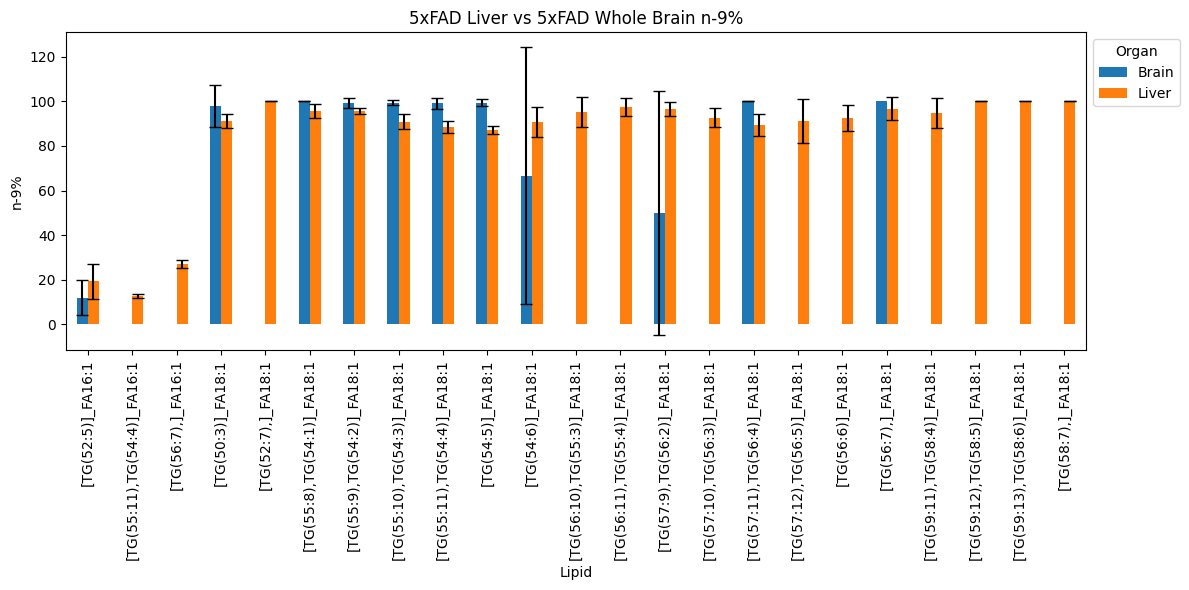

Organ,Brain_std,Liver_std,Brain_std,Liver_std
Lipid,,,,
[TG(52:5)]_FA16:1,12.0,19.4,7.9,7.9
"[TG(55:11),TG(54:4)]_FA16:1",NaN,12.8,NaN,0.9
"[TG(56:7),]_FA16:1",NaN,27.0,NaN,1.8
[TG(50:3)]_FA18:1,97.9,91.3,9.3,3.2
"[TG(52:7),]_FA18:1",NaN,100.0,NaN,0.0
"[TG(55:8),TG(54:1)]_FA18:1",100.0,95.7,0.0,3.0
"[TG(55:9),TG(54:2)]_FA18:1",99.3,95.7,2.3,1.4
"[TG(55:10),TG(54:3)]_FA18:1",99.4,90.8,1.2,3.4
"[TG(55:11),TG(54:4)]_FA18:1",99.0,88.4,2.5,2.8


In [94]:
df_5xfad = pd.concat([df_liver, df_brain])
df_5xfad

# Filter the DataFrame to include only 5xFAD samples
df_5xfad = df_5xfad[df_5xfad['Genotype'] == '5xFAD']
df_5xfad

# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df_5xfad[(df_5xfad['Lipid'].str.contains('TG\(56:7\)')) ]

filtered_rows

# Create a new column 'Organ'
df_5xfad['Organ'] = df_5xfad['Biology'].apply(lambda x: 'Liver' if x == 'liver' else 'Brain')

df_5xfad

# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df_5xfad[(df_5xfad['Lipid'].str.contains('TG\(56:7\)')) ]

filtered_rows


df_5xfad_drop = df_5xfad[['Lipid', 'Organ','n-9_avg', 'std_dev']].drop_duplicates()
# df_5xfad_drop.to_csv('df_5xfad_drop.csv')   
df_5xfad_drop

# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df_5xfad_drop[(df_5xfad_drop['Lipid'].str.contains('TG\(56:7\)')) ]

filtered_rows


# Assuming df_5xfad_drop is created as per your code snippet

# Pivot the DataFrame to have Organ as columns
pivot_df_organ = df_5xfad_drop.pivot(index='Lipid', columns='Organ', values='n-9_avg')
pivot_df_organ
# ############
# # Create a sorting key based on the index (Lipid names) to bring certain lipids first, if applicable
# pivot_df_organ['Sort_Key'] = pivot_df_organ.index.str.contains('FA16:1').astype(int)

# # Sort the DataFrame based on the sorting key
# pivot_df_organ = pivot_df_organ.sort_values(by='Sort_Key', ascending=False)

# # Drop the sorting key column
# pivot_df_organ.drop('Sort_Key', axis=1, inplace=True)

# # Pivot the DataFrame for standard deviation values to be used as error bars
pivot_df_std_dev_organ = df_5xfad_drop.pivot(index='Lipid', columns='Organ', values='std_dev')
pivot_df_std_dev_organ
# ###########
def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_organ['Combined_Sort_Key'] = pivot_df_organ.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_organ = pivot_df_organ.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_organ.drop('Combined_Sort_Key', axis=1, inplace=True)


pivot_df_organ

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_organ.plot(kind='bar', yerr=pivot_df_std_dev_organ, ax=ax, capsize=4)


# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('5xFAD Liver vs 5xFAD Whole Brain n-9%')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Organ', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
#save figure to Barplot_OzON/9% folder
plt.savefig('Bar%/Area/LiverVsBrain_5xFAD_n-9%_Area.png', dpi=300)
plt.savefig('Bar%/Area/LiverVsBrain_5xFAD_n-9%_Area.pdf', dpi=300)
plt.show()

liver_brain_std = pd.concat([pivot_df_organ, pivot_df_std_dev_organ], axis=1)
liver_brain_std.rename(columns={"Brain": "Brain_std", "Liver": "Liver_std"}, inplace=True)
liver_brain_std.to_csv('Bar%/std/liver_brain_n9%_std.csv')
liver_brain_std.to_excel('Bar%/std/liver_brain_n9%_std.xlsx')
liver_brain_std

